# 对kaggle-Titanic的初体验

## import一些要用包

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

%matplotlib inline
warnings.filterwarnings('ignore')

D:\akon_wang\python\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\akon_wang\python\Anaconda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
train_data = pd.read_csv(r'train.csv')
test_data  = pd.read_csv(r'test.csv')
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 这里可以看到train data和text data所包含哪些变量,当然区别就是text没有survived.
PassengerId => 乘客ID<br>
Pclass => 乘客等级(1/2/3等舱位)<br>
Name => 乘客姓名<br>
Sex => 性别<br>
Age => 年龄<br>
SibSp => 堂兄弟/妹个数<br>
Parch => 父母与小孩个数<br>
Ticket => 船票信息<br>
Fare => 票价<br>
Cabin => 客舱<br>
Embarked => 登船港口

In [4]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


测试数据一共有891条,可以看到在测试集大概有38%的人活了下来.<br>
年龄段在0-80岁,平均年龄29岁.在仓位中,2,3等舱是要比1等舱人多的.<br>
在训练集上,AGE的数据只有714条,少了177条.cabin只有204条,大量的缺失,后面看看cabin和survived的关系,看要不要把它drop掉.Embarked缺失2条.<br>
Fare在测试级上有一条缺失到时候用中位数填补一下。<br>

In [10]:
train_data.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wright, Mr. George",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [11]:
test_data.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Ryerson, Master. John Borie",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


## name里面竟然没有重名，不过外国人的name在第二项的时候可以看出他是男是女，比如Mr，Miss这些。

# 接下来开始特征工程啦

## 首先删除训练集的passenger ID

In [12]:
train_df = train_data.copy()
train_df.drop(['PassengerId'],axis=1,inplace=True) 
test_df = test_data.copy()
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 首先对最简单的Sex做处理。

In [13]:
train_df['Sex'] = train_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test_df['Sex'] = test_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

## 对name做处理

In [14]:
def Name_Title_Code(x):
    if x == 'Mr.':
        return 1
    if (x == 'Mrs.') or (x=='Ms.') or (x=='Lady.') or (x == 'Mlle.') or (x =='Mme'):
        return 2
    if x == 'Miss':
        return 3
    if x == 'Rev.':
        return 4
    else:
        return 5

In [15]:
train_df['Name_Title'] = train_df['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
test_df['Name_Title'] = test_df['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

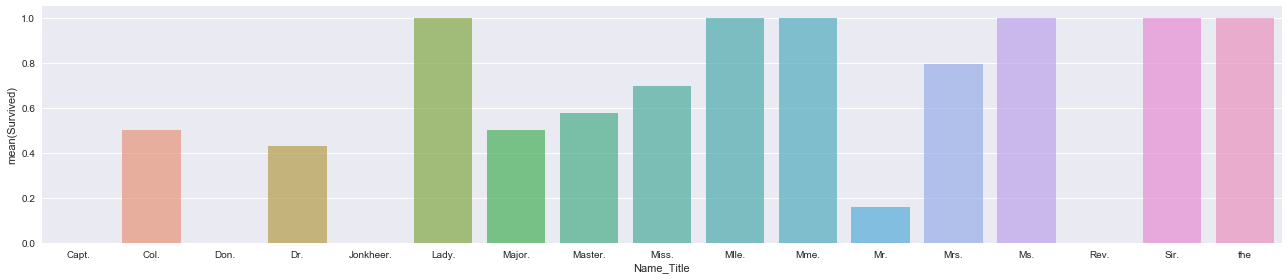

In [16]:
average_name = train_df[['Name_Title', 'Survived']].groupby(['Name_Title'],as_index= False).mean()
plt.figure(figsize = (18,4))
sns.barplot(x='Name_Title', y='Survived', data = average_name, alpha = 0.7)
plt.tight_layout()
plt.grid =True
plt.show()

## 可以看出带有女性称呼的人获救比较多

## 接下来对Age做处理，之前想过用随机森林对Age的缺失值做处理，发现分数怎么也提不上去，下面我把这种方法写着，后来看到网上的这种方法，就是对Name归类后再按仓位和Name类别Groupby之后求平均数。我觉得这样的理由是，因为一般高级仓位肯定是年龄大一点的人买的，低级仓位就是年轻人买的，然后再按男女的不同填充平均值。

In [17]:
# def set_missing_ages(df):
#     age_df = df[['Age', 'Fare', 'Pclass', 'Fam_Size_Big', 'Fam_Size_Nuclear', 'Fam_Size_Solo']]
#
#     known_age = age_df[age_df.Age.notnull()].as_matrix()
#     unknown_age = age_df[age_df.Age.isnull()].as_matrix()
#
#     y = known_age[:, 0]
#     X = known_age[:, 1:]
#
#     rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
#     rfr.fit(X, y)
#
#     predictedAges = rfr.predict(unknown_age[:, 1::])
#
#     df.loc[(df.Age.isnull()), 'Age'] = predictedAges
#     return df


def Age_filter(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
#         i['Age'] = data.transform(lambda x: x.fillna(x.median()))
    return train, test

## 对SibSp和Parch做处理，这里会做一个整合，合起来当成以家庭为单位处理

In [18]:
def Family_feature(df):
    df['Fam_Size'] =df['SibSp']+df['Parch']
    df['Fam_Size'].loc[df['Fam_Size'] == 0] = 0
    df['Fam_Size'].loc[(df['Fam_Size'] > 0) & (df['Fam_Size'] <= 3)] = 1
#     df['Fam_Size'].loc[df['Fam_Size'] == 2] = 2
#     df['Fam_Size'].loc[df['Fam_Size'] == 3] = 2
    df['Fam_Size'].loc[df['Fam_Size'] > 3] = 2
    del df['SibSp']
    del df['Parch']
    return df    
def family_filter(train_df,test_df):
    train_df = Family_feature(train_df)
    test_df =  Family_feature(test_df)
    return train_df, test_df

## 接下来对ticket做处理

In [19]:
def ticket_filter(train, test):
    for i in [train, test]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x: str(x))
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                    np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
        #这一步是先进来一个string，如果string里有['1', '2', '3', 'S', 'P', 'C', 'A']，那就返回这个string，否则进入进一步筛选
        #如果string含有['W', '4', '7', '6', 'L', '5', '8']且没有['1', '2', '3', 'S', 'P', 'C', 'A']，就是'Low_ticket'，否则是'Other_ticket'
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

## 对Cabin做处理，将Cabin的头一个字母提出来，组成Cabin_letter,然后后面的数字分为三组。

In [20]:
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3) #将数据分为3份
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test

def Cabin_feature(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

## 对Embarked做处理

In [21]:
def embarked_filter(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

## 对Fare做处理,因为在test中有一个缺失值,直接用中位数填充即可

In [22]:
test_df['Fare'].fillna(train_df['Fare'].mean(), inplace = True) #对Fare缺失值做个处理

## 看看Fare和存活率的关系

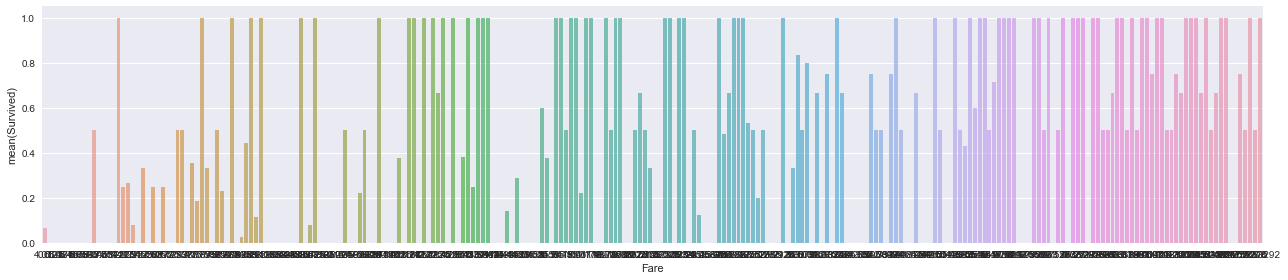

In [23]:
average_age = train_df[['Fare', 'Survived']].groupby(['Fare'],as_index= False).mean()
plt.figure(figsize = (18,4))
sns.barplot(x='Fare', y='Survived', data = average_age, alpha = 0.7)
plt.tight_layout()
plt.grid =True
plt.show()

## 所以还是有钱人先走啊,哎,万恶的资本主义

## 接下来做一个dummies的函数因为发现再某些类别里面有的字段只有train有，如果直接做dummies的话，数据就不一样了

In [24]:
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [25]:
train_df, test_df = Age_filter(train_df, test_df)
 
train_df['Name_Title'] = train_df['Name_Title'].apply(Name_Title_Code)
test_df['Name_Title'] = test_df['Name_Title'].apply(Name_Title_Code)
train_df = pd.get_dummies(columns = ['Name_Title'], data = train_df)
test_df = pd.get_dummies(columns = ['Name_Title'], data = test_df)



train_df, test_df = cabin_num(train_df, test_df)

train_df, test_df = Cabin_feature(train_df, test_df)

train_df, test_df = embarked_filter(train_df, test_df)

train_df, test_df = family_filter(train_df, test_df)

train_df, test_df = ticket_filter(train_df, test_df)

# train, test = dummies(train, test, columns=['Fam_Size'])

# train, test = dummies(train, test, columns=['Fam_Size'])

# train = set_missing_ages(train)
# test = set_missing_ages(test)



train_df, test_df = dummies(train_df, test_df, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 
                                                          'Fam_Size',
                                                          'Cabin_Letter'])  
train_df.drop('Name',axis=1,inplace=True)
test_df.drop('Name',axis=1,inplace=True)

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 40 columns):
Survived                      891 non-null int64
Age                           891 non-null float64
Fare                          891 non-null float64
Age_Null_Flag                 891 non-null int64
Name_Title_1                  891 non-null uint8
Name_Title_2                  891 non-null uint8
Name_Title_4                  891 non-null uint8
Name_Title_5                  891 non-null uint8
Cabin_num_(1.999, 28.667]     891 non-null uint8
Cabin_num_(28.667, 65.667]    891 non-null uint8
Cabin_num_(65.667, 148.0]     891 non-null uint8
Ticket_Len                    891 non-null int64
Pclass_3                      891 non-null uint8
Pclass_1                      891 non-null uint8
Pclass_2                      891 non-null uint8
Sex_1                         891 non-null uint8
Sex_0                         891 non-null uint8
Embarked_S                    891 non-null uint8
Embarked_

In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 40 columns):
PassengerId                   418 non-null int64
Age                           418 non-null float64
Fare                          418 non-null float64
Age_Null_Flag                 418 non-null int64
Name_Title_1                  418 non-null uint8
Name_Title_2                  418 non-null uint8
Name_Title_4                  418 non-null uint8
Name_Title_5                  418 non-null uint8
Cabin_num_(1.999, 28.667]     418 non-null uint8
Cabin_num_(28.667, 65.667]    418 non-null uint8
Cabin_num_(65.667, 148.0]     418 non-null uint8
Ticket_Len                    418 non-null int64
Pclass_3                      418 non-null uint8
Pclass_1                      418 non-null uint8
Pclass_2                      418 non-null uint8
Sex_1                         418 non-null uint8
Sex_0                         418 non-null uint8
Embarked_S                    418 non-null uint8
Embarked_

In [28]:
test_df.to_csv('new_test.csv')
train_df.to_csv('new_train.csv')